In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, 0.1)
model.add_layer(DenseLayer(1, 8, True, weight_constraint=[-3, 3], afn=sigmoid, dafn=d_sigmoid, rfn=None))
model.add_layer(DenseLayer(2, 4, True, weight_constraint=[-3, 3], afn=sigmoid, dafn=d_sigmoid, rfn=None))
model.add_layer(DenseLayer(3, 3, True, weight_constraint=[-3, 3], afn=softmax, dafn=d_sigmoid, rfn=None))

In [4]:
# optimizer
opt = 'sgd'

In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = opt, \
    metrics = ['accuracy', 'mean_square_error', 'essential_metrics','categorical_crossentropy'])

building layer 1 with 5
48
building layer 2 with 8
36
building layer 3 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 15000
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)


In [8]:
# learning phase
history = model.fit(x_train, y_train, EPOCHS)

eration 14622/15000: 	0.8213035369587836
itr 14623
Iteration 14623/15000: 	0.8213035369587836
itr 14624
Iteration 14624/15000: 	0.8213035369587836
itr 14625
Iteration 14625/15000: 	0.8213035369587836
itr 14626
Iteration 14626/15000: 	0.8213035369587836
itr 14627
Iteration 14627/15000: 	0.8213035369587836
itr 14628
Iteration 14628/15000: 	0.8213035369587836
itr 14629
Iteration 14629/15000: 	0.8213035369587836
itr 14630
Iteration 14630/15000: 	0.8213035369587836
itr 14631
Iteration 14631/15000: 	0.8213035369587836
itr 14632
Iteration 14632/15000: 	0.821303465656031
itr 14633
Iteration 14633/15000: 	0.8213035369587836
itr 14634
Iteration 14634/15000: 	0.8213035369587836
itr 14635
Iteration 14635/15000: 	0.8213035369587836
itr 14636
Iteration 14636/15000: 	0.8213035369587836
itr 14637
Iteration 14637/15000: 	0.8213035369587836
itr 14638
Iteration 14638/15000: 	0.8213035369587836
itr 14639
Iteration 14639/15000: 	0.8213035369587836
itr 14640
Iteration 14640/15000: 	0.8213035369587836
itr 14

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for y in y_list:
        ax.plot(x, y)
    if x_label is not None and y_label is not None and title is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title=title)
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()



In [10]:
print(history)

.8213085994542202, 0.8213085994542202, 0.8213085994542202, 0.821308456848715, 0.8213085994542202, 0.8213085281514676, 0.8213085281514676, 0.8213085281514676, 0.8213085281514676, 0.821308456848715, 0.8213085281514676, 0.821308456848715, 0.821308456848715, 0.821308456848715, 0.821308456848715, 0.821308456848715, 0.821308456848715, 0.821308456848715, 0.821308456848715, 0.8213083855459623, 0.8213083855459623, 0.8213083142432097, 0.8213083142432097, 0.8213083142432097, 0.8213083142432097, 0.8213083142432097, 0.8213083142432097, 0.8213083142432097, 0.8213083142432097, 0.8213083142432097, 0.8213083142432097, 0.8213083142432097, 0.8213083142432097, 0.8213082429404571, 0.8213083142432097, 0.8213082429404571, 0.8213082429404571, 0.8213081716377044, 0.8213081716377044, 0.8213081716377044, 0.8213081716377044, 0.8213081716377044, 0.8213081716377044, 0.8213081716377044, 0.8213081716377044, 0.8213082429404571, 0.8213081716377044, 0.8213081716377044, 0.8213081716377044, 0.8213081716377044, 0.821308100

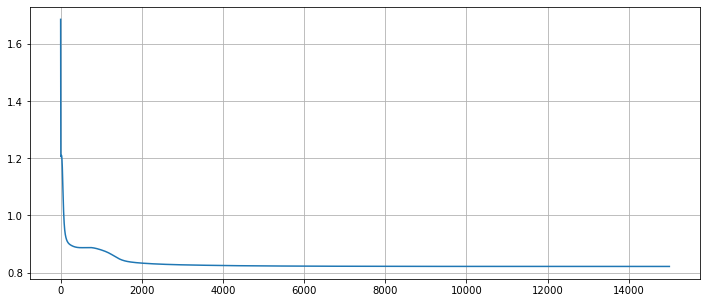

In [11]:
draw_plot(x = [i for i in range(len(history))], y_list = [history], x_label = 'Epochs', \
    y_label = model.loss_fn)

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.55258775]
 [0.24561352]
 [0.20179878]]
[1. 0. 0.] <-> [[0.96343875]
 [0.0200267 ]
 [0.01653459]]
[1. 0. 0.] <-> [[0.54552436]
 [0.24691987]
 [0.20755576]]
[0. 0. 1.] <-> [[0.5451909]
 [0.2473592]
 [0.2074499]]
[1. 0. 0.] <-> [[0.54650694]
 [0.24729037]
 [0.20620264]]
[1. 0. 0.] <-> [[0.56884277]
 [0.23622896]
 [0.1949283 ]]
[1. 0. 0.] <-> [[0.61050737]
 [0.21291386]
 [0.1765788 ]]
[1. 0. 0.] <-> [[0.545685  ]
 [0.24671207]
 [0.20760296]]
[0. 1. 0.] <-> [[0.5450687 ]
 [0.2474804 ]
 [0.20745091]]
[1. 0. 0.] <-> [[0.66922724]
 [0.18046114]
 [0.15031166]]
[1. 0. 0.] <-> [[0.54691964]
 [0.24874106]
 [0.20433924]]
[0. 1. 0.] <-> [[0.54548806]
 [0.24697234]
 [0.20753959]]
[0. 0. 1.] <-> [[0.54510754]
 [0.2474546 ]
 [0.20743787]]
[0. 0. 1.] <-> [[0.9663041 ]
 [0.01867548]
 [0.01502042]]
[1. 0. 0.] <-> [[0.54672045]
 [0.24749918]
 [0.20578034]]
[1. 0. 0.] <-> [[0.64250195]
 [0.19520292]
 [0.16229524]]
[0. 0. 1.] <-> [[0.5303481 ]
 [0.2292332 ]
 [0.24041867]]
[1. 0. 0.] <-> [[

In [13]:
print(model)

Neuron 0: weights:
[[ 3.828677  ]
 [-6.919912  ]
 [ 0.13402373]
 [ 3.9009452 ]
 [ 7.048502  ]]
 bias: [-22.78652798]

Neuron 1: weights:
[[  7.9006124]
 [-12.190247 ]
 [ -7.95836  ]
 [  2.7165482]
 [  8.482829 ]]
 bias: [-1.88265284]

Neuron 2: weights:
[[ 1.6556227 ]
 [ 0.633707  ]
 [-4.794143  ]
 [-0.79499894]
 [ 0.69841677]]
 bias: [-2.73470542]

Neuron 3: weights:
[[ -4.4912453]
 [  9.708288 ]
 [  3.1840293]
 [ -6.8014345]
 [-12.624149 ]]
 bias: [-9.0845319]

Neuron 4: weights:
[[ 3.1985765]
 [-6.294167 ]
 [-3.1743424]
 [-3.3197062]
 [-1.0656061]]
 bias: [-10.5391106]

Neuron 5: weights:
[[-0.4744742]
 [ 4.230122 ]
 [ 1.1441249]
 [-2.9831254]
 [ 0.946254 ]]
 bias: [6.05967944]

Neuron 6: weights:
[[-11.087332]
 [ 12.587964]
 [ 10.542058]
 [ -9.933714]
 [-11.295158]]
 bias: [-3.64786928]

Neuron 7: weights:
[[-3.1864252]
 [ 0.7408009]
 [ 1.7209718]
 [-1.3524082]
 [ 0.7171255]]
 bias: [7.82943902]

$
Neuron 0: weights:
[[ 2.1796653 ]
 [ 2.0787525 ]
 [ 0.38625953]
 [-2.895986  ]
 [ 0.